In [ ]:
# ⚠️ Run this cell only once - to modify the working directory and import paths to parent directory one level up.

import sys
import os

# Change cwd to project root (one level up from 'notebooks')
os.chdir("..")

# Add project root to sys.path to allow importing from 'src'
sys.path.append(os.getcwd())

## 1. Load the gpx data

In [2]:
# gpx_file_path = "data/31_Mar_2025_10_30_57.gpx"
# gpx_file_path = "data/2024-10-17_13_02_around_thi.gpx"
# gpx_file_path = "data/2024-10-24_12_42_hohe_mandel.gpx"
# gpx_file_path = "data/around_uni_gold.gpx"
# gpx_file_path = "data/around_uni_williams.gpx"
# gpx_file_path = "data/DollnsteinRoutePrashil.gpx"
gpx_file_path = "data/DollnsteinRouteTom.gpx"

In [3]:
from src.models import Track

track_1 = Track.from_gpx_file(gpx_file_path)

## 2. Comparision with online APIs

In [4]:
from src.elevation_api import OpenElevationAPI, OpenStreetMapElevationAPI

track_openstreetmap = track_1.with_api_elevations(OpenStreetMapElevationAPI)
track_openelevation = track_1.with_api_elevations(OpenElevationAPI)

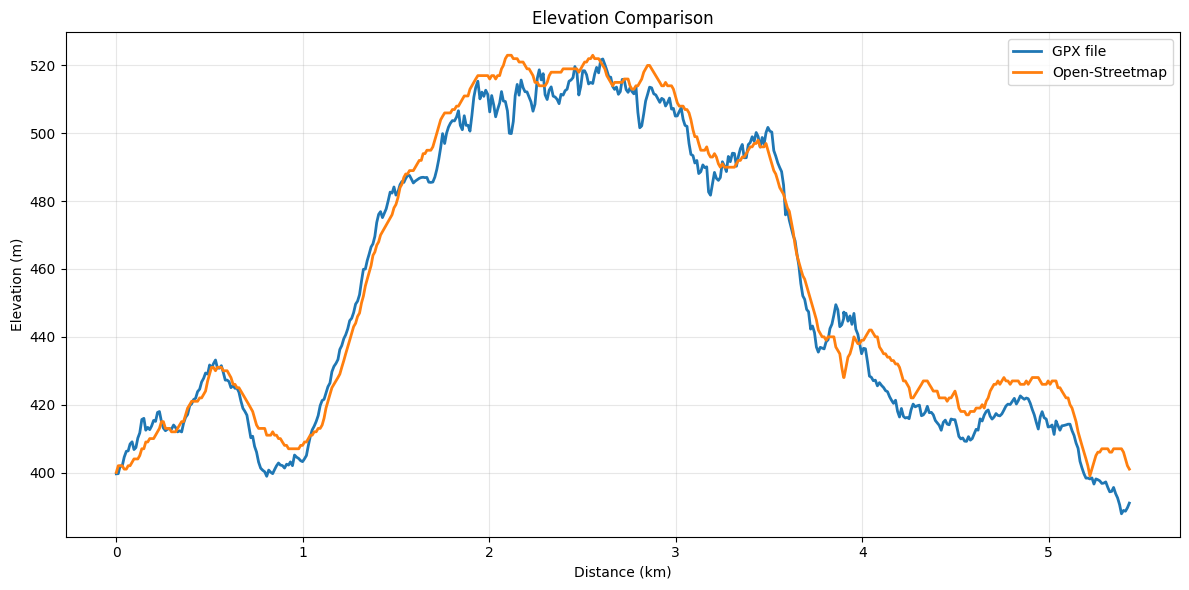

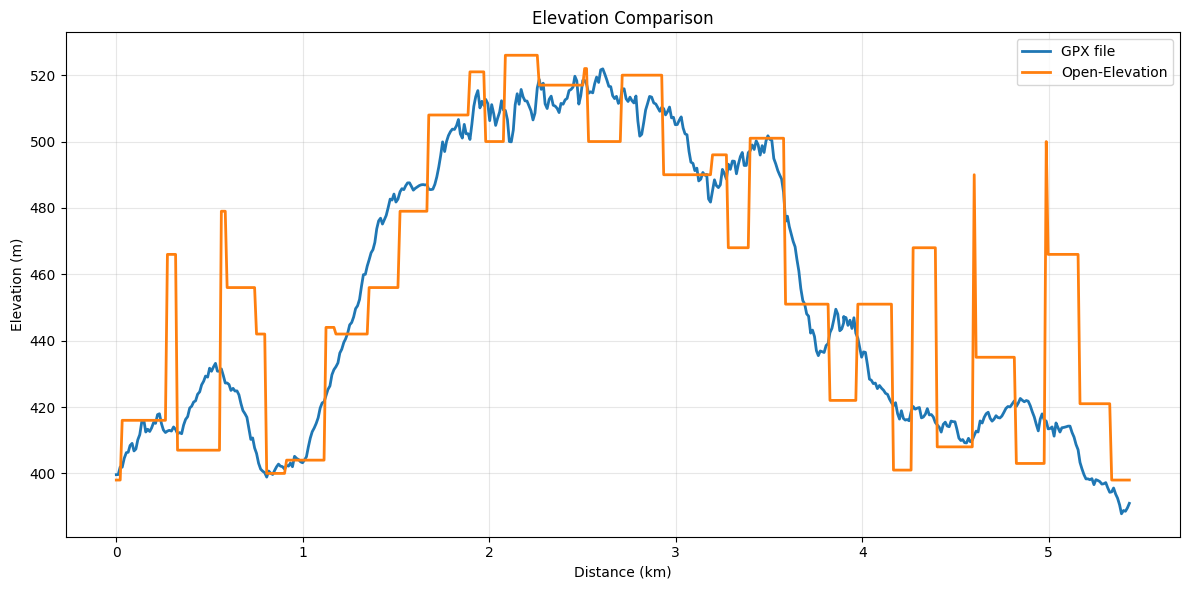

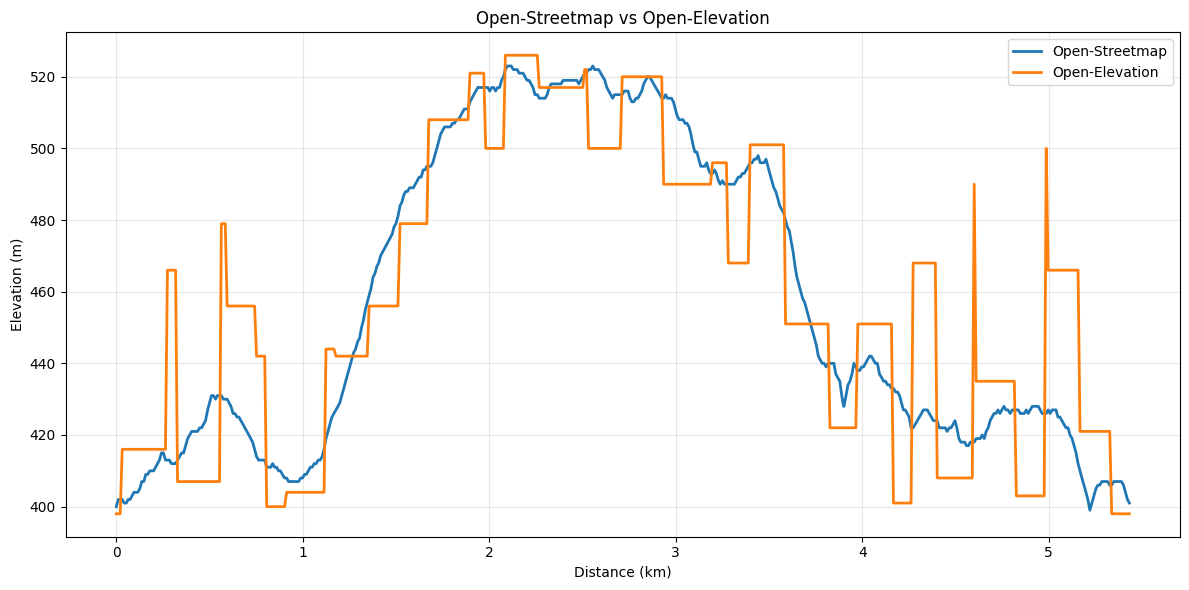

In [12]:
from src.plotter import Plotter

# Comparision with openstreetmap
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_openstreetmap.elevation_profile, "Open-Streetmap"),
]).plot_distance_vs_elevation()

# Comparision with Open-Elevation
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_openelevation.elevation_profile, "Open-Elevation"),
]).plot_distance_vs_elevation()

# Comparision between Open-Streetmap and Open-Elevation
Plotter([
	(track_openstreetmap.elevation_profile, "Open-Streetmap"),
	(track_openelevation.elevation_profile, "Open-Elevation"),
]).plot_distance_vs_elevation(title="Open-Streetmap vs Open-Elevation")


## 3. Applying smoothing algorithm 

### Apply smoothing algorithm **LOESS V1** on the recorded data

In [6]:
track_1_loess_v1 = track_1.with_smoothed_elevations('loess_v1', window=0.75)

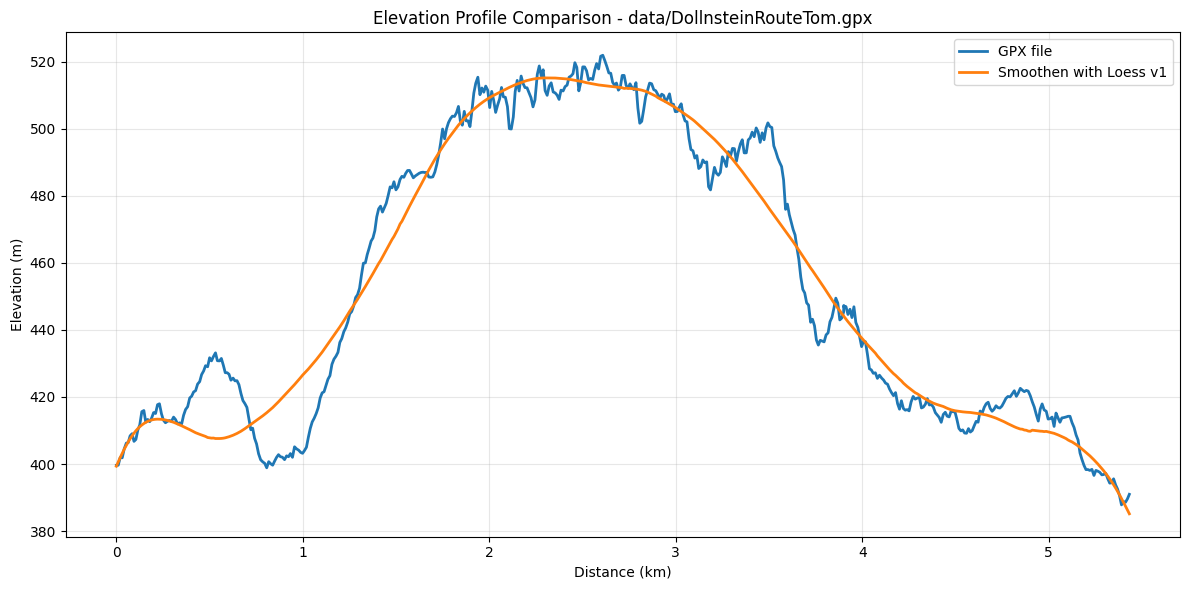

In [7]:
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_1_loess_v1.elevation_profile, "Smoothen with Loess v1"),
]).plot_distance_vs_elevation(title=f"Elevation Profile Comparison - {gpx_file_path}")	

### Apply smoothing algorithm **LOESS V2** on the recorded data

In [8]:
track_1_loess_v2 = track_1.with_smoothed_elevations('loess_v2')

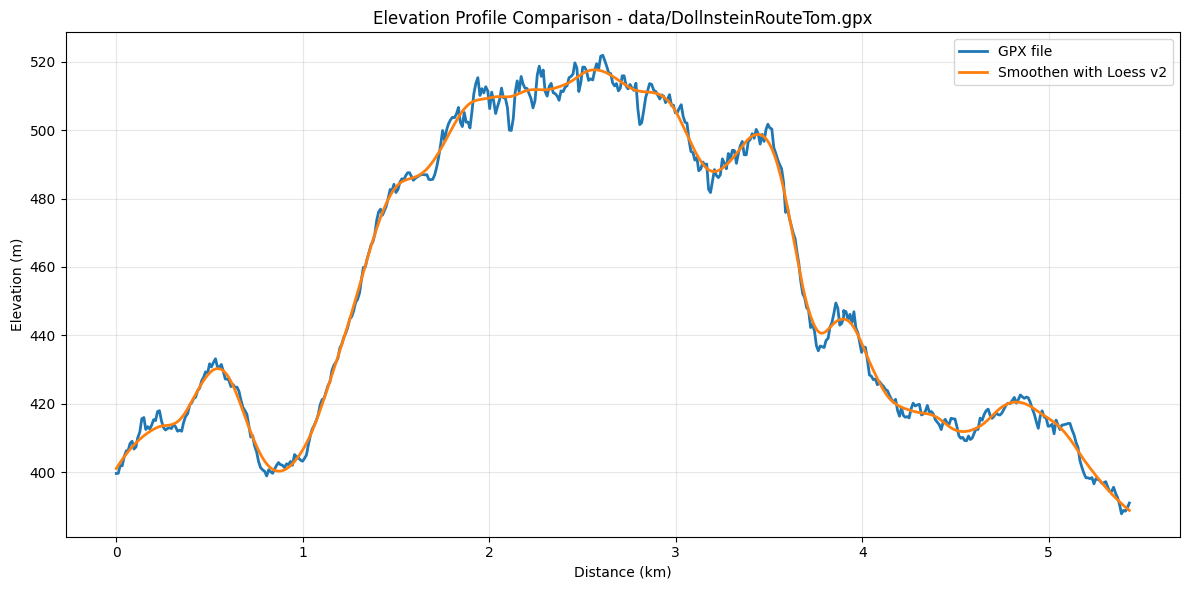

In [9]:
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_1_loess_v2.elevation_profile, "Smoothen with Loess v2"),
]).plot_distance_vs_elevation(title=f"Elevation Profile Comparison - {gpx_file_path}")

### Apply smoothing algorithm **spline** on the recorded data

In [10]:
track_1_spline = track_1.with_smoothed_elevations('spline')

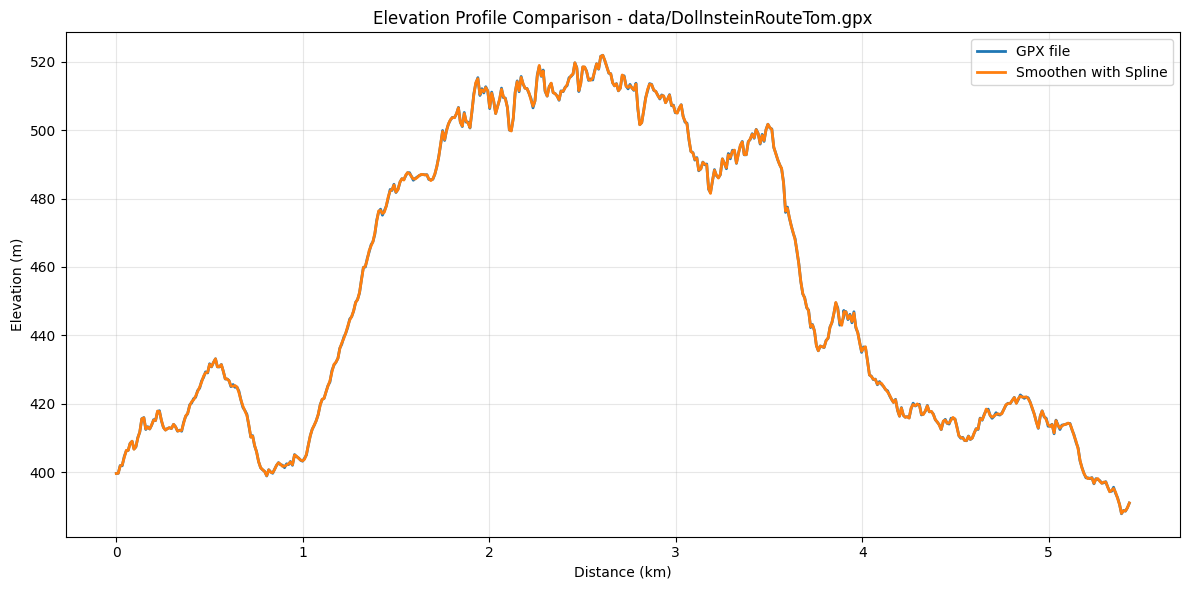

In [11]:
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_1_spline.elevation_profile, "Smoothen with Spline"),
]).plot_distance_vs_elevation(title=f"Elevation Profile Comparison - {gpx_file_path}")